<a href="https://colab.research.google.com/github/MonitSharma/Quantum-Computing-with-Qiskit-and-IBMQ/blob/main/Represenitng_Qubit_States.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Representing Qubit States

You now know something about bits, and about how our familiar digital computers work. All the complex variables, objects and data structures used in modern software are basically all just big piles of bits. Those of us who work on quantum computing call these classical variables. The computers that use them, like the one you are using to read this article, we call classical computers



In quantum computers, the basic unit of information is *qubit*:a quantum variant of bit. These have exactly the same restrictions as normal bits do: they can store only a single binary piece of information, and can only ever give us an output of 0 or 1. However, they can also be manipulated in ways that can only be described by quantum mechanics. This gives us new gates to play with, allowing us to find new ways to design algorithms.


To fully understand these new gates, we first need to understand how to write down qubit states. For this we will use the mathematics of vectors, matrices, and complex numbers. Though we will introduce these concepts as we go, it would be best if you are comfortable with them already.

I have made an entire series on [Computational Linear Algebra](https://medium.com/@_monitsharma/list/computational-linear-algebra-c25866dd2935) that you can check, or maybe see the previous lectures of this series, that have a minor introduction to Linear Algebra.

### 1. Classical vs Quantum Bits

#### 1.1 Statevectors

In quantum physics we use statevectors to describe the state of our system. Say we wanted to describe the position of a car along a track, this is a classical system so we could use a number $x$


![](https://learn.qiskit.org/content/v2/ch-states/images/car_track_1.jpg)



$$ x = 4 $$

Alternatively, we could instead use a collection of numbers in a vector called a statevector. Each element in the statevector contains the probability of finding the car in a certain place:

![](https://learn.qiskit.org/content/v2/ch-states/images/car_track_2.jpg)



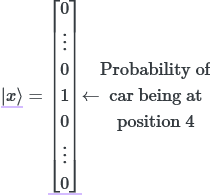


This isn’t limited to position, we could also keep a statevector of all the possible speeds the car could have, and all the possible colours the car could be. With classical systems (like the car example above), this is a silly thing to do as it requires keeping huge vectors when we only really need one number. But as we will see in this chapter, statevectors happen to be a very good way of keeping track of quantum systems, including quantum computers.

### 1.2 Qubit Notation

Classical bits are always either 0 or 1 at every point during a computation. There is no more detail we can add to the state of a bit than this. So to write down the state of a of classical bit (c), we can just use these two binary values. For example:

$$ c = 0 $$


This restriction is lifted for quantum bits. Whether we get a 0 or a 1 from a qubit only needs to be well-defined when a measurement is made to extract an output. At that point, it must commit to one of these two options. At all other times, its state will be something more complex than can be captured by a simple binary value.

To see how to describe these, we can first focus on the two simplest cases. As we saw in the last section, it is possible to prepare a qubit in a state for which it definitely gives the outcome 0 when measured.

We need a name for this state. Let's be unimaginative and call it . Similarly, there exists a qubit state that is certain to output a 1. We'll call this . These two states are completely mutually exclusive. Either the qubit definitely outputs a 0, or it definitely outputs a 1. There is no overlap. One way to represent this with mathematics is to use two orthogonal vectors.

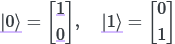


This is a lot of notation to take in all at once. First, let's unpack the weird $|$ and $⟩$ heir job is essentially just to remind us that we are talking about the vectors that represent qubit states labelled and . This helps us distinguish them from things like the bit values 0 and 1 or the numbers 0 and 1. It is part of the bra-ket notation, introduced by Dirac.

If you are not familiar with vectors, you can essentially just think of them as lists of numbers which we manipulate using certain rules. If you are familiar with vectors from your high school physics classes, you'll know that these rules make vectors well-suited for describing quantities with a magnitude and a direction. For example, the velocity of an object is described perfectly with a vector. However, the way we use vectors for quantum states is slightly different to this, so don't hold on too hard to your previous intuition. It's time to do something new!

With vectors we can describe more complex states than just $|0⟩$ and $|1⟩$ . For example, consider the vector


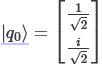


Since the states $|0⟩$ and $|1⟩$ form an orthonormal basis, we can represent any 2D vector with a combination of these two states. This allows us to write the state of our qubit in the alternative form:

Screenshot 2023-07-04 at 14-36-02 Representing Qubit States.png



This vector, $|q_0⟩$ is called the qubit's statevector, it tells us everything we could possibly know about this qubit. For now, we are only able to draw a few simple conclusions about this particular example of a statevector: it is not entirely $|0⟩$ and not entirely $|1⟩$. Instead, it is described by a linear combination of the two. In quantum mechanics, we typically describe linear combinations such as this using the word 'superposition'.

Though our example state $|q_0⟩$
can be expressed as a superposition of $|0\rangle$ and $|1⟩$, it is no less a definite and well-defined qubit state than they are. To see this, we can begin to explore how a qubit can be manipulated.

### 1.3 Exploring with Qiskit

Let's import basic tools

In [36]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit import *
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi


As we saw in the previous tutorial, er can make a qubit, The state $|0⟩$ is a vector $\begin{bmatrix} 1 \\ 0 \end{bmatrix}$ and the state $|1\rangle$ is also a vector, represented by $\begin{bmatrix} 0 \\ 1 \end{bmatrix}$

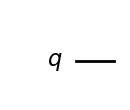

In [37]:
qc = QuantumCircuit(1)    # Create a quantum circuit with one qubit
qc.draw('mpl')

Let's initialize a state:

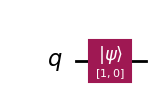

In [38]:
qc.initialize([1,0])  # Define initial_state as |0>
qc.draw('mpl')

or you can do this instead:

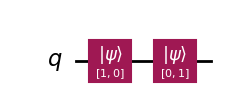

In [39]:
initial_state = [0,1]   # this is the |1> state
qc.initialize(initial_state,0) # apply the initialisation on the qubit
qc.draw('mpl')

To run the circuit we need a simulator to run it on, so we use a simulator provided by `qiskit`.



In [40]:
from qiskit.primitives import Sampler
sampler = Sampler()  # tell qiskit how to simulate the circuit

The `AerSimulator` provider contains a variety of high performance simulator backends for a variety of simulation methods. The available backends on the current system can be viewed using `.available_methods()`

In [41]:
backend = AerSimulator()  # tell qiskit to use the AerSimulator
backend.available_devices()

('CPU',)

In [42]:
backend.available_methods()

('automatic',
 'statevector',
 'density_matrix',
 'stabilizer',
 'matrix_product_state',
 'extended_stabilizer',
 'unitary',
 'superop')

We are using the `aer_simulator` from this list. We will learn more about **simulators** later.

We need to have a measurement operator at the end to get the result. So we will use `measure_all` to add the measurement operator. To get the results from our circuit, we use `run` to execute our circuit, giving the circuit and the backend as arguments. We then use `.result()` to get the result of this:

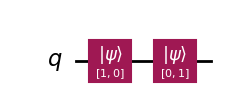

In [43]:

qc.draw('mpl')

We can get the final statevector using `.get_statevector()`

In [44]:
from qiskit.quantum_info import Statevector


# get the statevcector
state = Statevector.from_instruction(qc)
print(state)

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


Note: Python uses j to represent in complex numbers. We see a vector with two complex elements: 0.+0.j = 0, and 1.+0.j = 1.

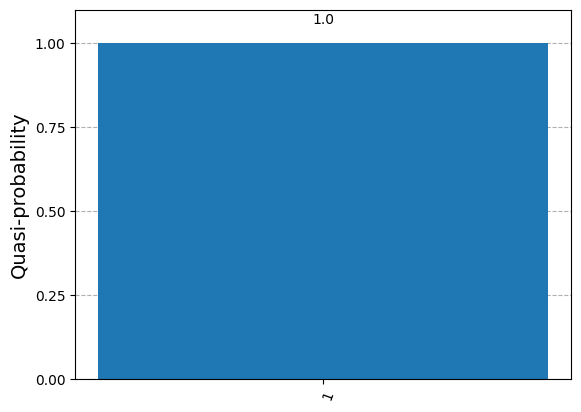

In [46]:
# lets plot the histogram
qc.measure_all()

# run the simulation
result = sampler.run(qc).result()
counts = result.quasi_dists[0]
plot_histogram(counts)

We can see that we (unsurprisingly) have a 100% chance of measuring $|1⟩$.



Let's use some other initialisation, we'll make our state into

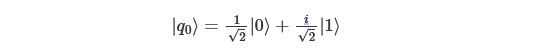

which is indirect way of putting the qubit in **Superposition** ( we will learn about it later)

In [47]:
initial_state = [1/sqrt(2), 1j/sqrt(2)]  # Define state |q_0>

And we then repeat the steps for initialising the qubit as before:

In [48]:
qc = QuantumCircuit(1)

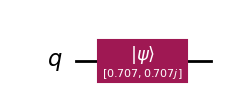

In [49]:
qc.initialize(initial_state,0) # apply the initialisation on the qubit
qc.draw('mpl')

In [51]:
# get the statevcector
state = Statevector.from_instruction(qc)
print(state)

Statevector([0.70710678+0.j        , 0.        +0.70710678j],
            dims=(2,))


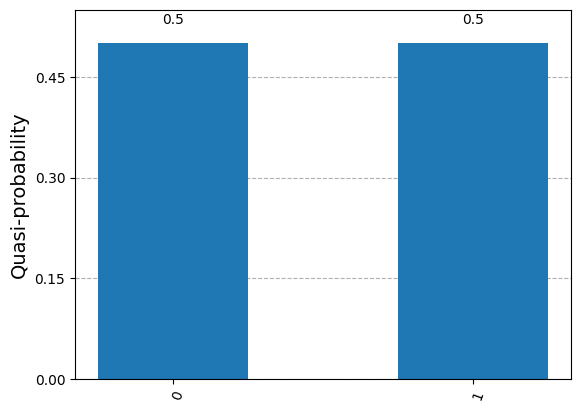

In [52]:
qc.measure_all()

# run the simulation
result = sampler.run(qc).result()
counts = result.quasi_dists[0]
plot_histogram(counts)


Let's plot the Histogram

We can see we have near equal probability of measuring compared to . To explain this, we need to talk about **measurement**.

## 2. The Rules of Measurement

### 2.1 A very important rule

There is a simple rule for measurement. To find the probability of measuring a state $|\psi\rangle$ in the state $|x⟩$ we do:


$$ p(|x⟩) = |⟨x|\psi⟩|^2 $$

The symbols $\langle$ and $|$ tell us is a row vector. In quantum mechanics we call the column vectors kets and the row vectors bras. Together they make up bra-ket notation. Any ket $|a\rangle$ has a corresponding bra $\langle a|$, and we convert between them using the conjugate transpose.


In the equation above,$|x⟩$ can be any qubit state. To find the probability of measuring $|x⟩$ , we take the inner product of $|x\rangle$ and the state we are measuring (in this case $|\psi⟩$), then square the magnitude. This may seem a little convoluted, but it will soon become second nature.




If we look at the state $|q_0⟩$ from before, we can see the probability of measuring $|0⟩$ is indeed $0.5$

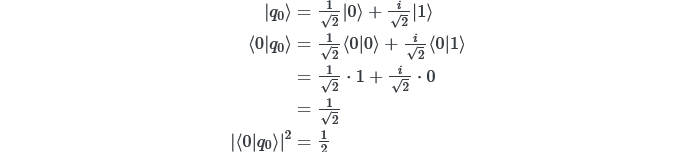

### 2.2 The Implications of this Rule

#### a) Normalization

The rule shows us that amplitudes are related to probabilities. If we want the probabilities to add up to 1 (which they should!), we need to ensure that the statevector is properly normalized. Specifically, we need the magnitude of the state vector to be 1.


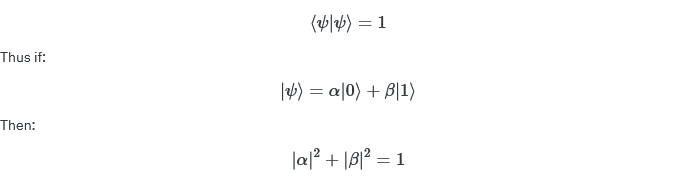

This explains the factors of $\sqrt{2}$ you have seen throughout this chapter. In fact, if we try to give `initialize()` a vector that isn’t normalised, it will give us an error:

In [ ]:
vector = [1,1]

qc.initialize(vector,0)

QiskitError: ignored

```python
QiskitError: 'Sum of amplitudes-squared does not equal one.'
```

Hence non-normalized states are not allowed.

#### b) Alternative Measurement

The measurement rule gives us the probability $p(|x⟩)$ that a state $|\psi⟩$ is measured as $|x⟩$. Nowhere does it tell us that $|x\rangle$ can only be either $|0⟩$ or $|1⟩$.

The measurements we have considered so far are in fact only one of an infinite number of possible ways to measure a qubit. For any orthogonal pair of states, we can define a measurement that would cause a qubit to choose between the two.

This possibility will be explored more in the next section. For now, just bear in mind that $|x⟩$ is not limited to being simply $|0\rangle$ or $|1⟩$.

#### c) Global Phase
We know that measuring the state $|1⟩$ will give us the output 1 with certainty. But we are also able to write down states such as

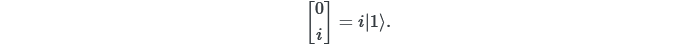


To see how this behaves, we apply the measurement rule.



Screenshot 2023-07-04 at 15-17-15 Representing Qubit States.png


Here we find that the factor of $\iota$ disappears once we take the magnitude of the complex number. This effect is completely independent of the measured state $|x⟩$. It does not matter what measurement we are considering, the probabilities for the state $\iota|1\rangle$ are identical to those for $|1⟩$. Since measurements are the only way we can extract any information from a qubit, this implies that these two states are equivalent in all ways that are physically relevant.

#### 4. The Observer Effect

We know that the amplitudes contain information about the probability of us finding the qubit in a specific state, but once we have measured the qubit, we know with certainty what the state of the qubit is. For example, if we measure a qubit in the state:

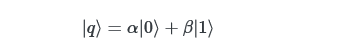


And find it in the state $|0⟩$, if we measure again, there is a 100% chance of finding the qubit in the state $|0⟩$. This means the act of measuring changes the state of our qubits.

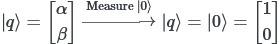


We sometimes refer to this as collapsing the state of the qubit. It is a potent effect, and so one that must be used wisely. For example, were we to constantly measure each of our qubits to keep track of their value at each point in a computation, they would always simply be in a well-defined state of either $|0\rangle$ or $|1⟩$. As such, they would be no different from classical bits and our computation could be easily replaced by a classical computation. To achieve truly quantum computation we must allow the qubits to explore more complex states. Measurements are therefore only used when we need to extract an output. This means that we often place all the measurements at the end of our quantum circuit.

Let's see this voa code:

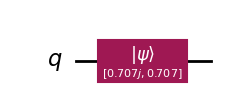

In [53]:
qc = QuantumCircuit(1)   # making a new quantum circuit
initial_state = [0.+1.j/sqrt(2),1/sqrt(2)+0.j]
qc.initialize(initial_state,0)
qc.draw('mpl')

This code initialize our qubit in the following state:

Screenshot 2023-07-04 at 15-24-06 Representing Qubit States.png



Let's verify this using Statevector

In [54]:
qc = QuantumCircuit(1)
initial_state = [0.+1.j/sqrt(2),1/sqrt(2)+0.j]
qc.initialize(initial_state, 0)

# get the statevcector
state = Statevector.from_instruction(qc)
print(state)

Statevector([0.        +0.70710678j, 0.70710678+0.j        ],
            dims=(2,))


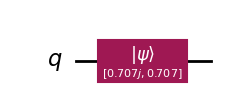

In [56]:
qc.draw('mpl')

When we simulate this entire circuit, we can see that one of the amplitudes is always 0:

You can re-run this cell a few times to reinitialize the qubit and measure it again. You will notice that either outcome is equally probable, but that the state of the qubit is never a superposition of $|0\rangle$ and $|1\rangle$. Somewhat interestingly, the global phase on the state $|0\rangle$ survives, but since this is global phase, we can never measure it on a real quantum computer.

##### **A Note about Quantum Simulators**
We can see that writing down a qubit’s state requires keeping track of two complex numbers, but when using a real quantum computer we will only ever receive a yes-or-no (0 or 1) answer for each qubit. The output of a 10-qubit quantum computer will look like this:

$$0110111110$$

Just 10 bits, no superposition or complex amplitudes. When using a real quantum computer, we cannot see the states of our qubits mid-computation, as this would destroy them! This behaviour is not ideal for learning, so Qiskit provides different quantum simulators: By default, the `aer_simulator` mimics the execution of a real quantum computer, but will also allow you to peek at quantum states before measurement if we include certain instructions in our circuit. For example, here we have included the instruction `.save_statevector()`, which means we can use `.get_statevector()` on the result of the simulation.

## 3. The Bloch Sphere

### 3.1 Describing the Restricted Qubit State

We saw earlier in this chapter that the general state of a qubit ($|q⟩$) is:

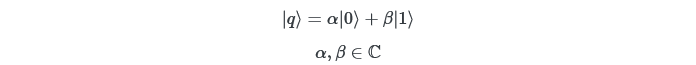

(The second line tells us $\alpha$ and $\beta$ are complex numbers). The first two implications in section 2 tell us that we cannot differentiate between some of these states. This means we can be more specific in our description of the qubit.

Firstly, since we cannot measure global phase, we can only measure the difference in phase between the states $|0\rangle$ and $|1\rangle$. Instead of having $\alpha$ and $\beta$ be complex, we can confine them to the real numbers and add a term to tell us the relative phase between them:


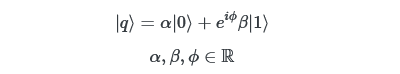


Finally, since the qubit state must be normalised, i.e.

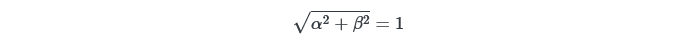


we can use the trigonometric identity:
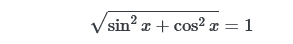


to describe the real $\alpha$ and $\beta$ in terms of one variable, $\theta$ :


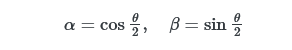

From this we can describe the state of any qubit using the two variables $\phi$ and $\theta$:

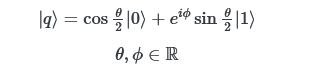

### 3.2 Visually Representing a Qubit State

We want to plot our general qubit state

Screenshot 2023-07-04 at 15-46-34 Representing Qubit States.png

If we interpret $ \theta$ and $\phi$ as spherical co-ordinates ($r=1$, since the magnitude of the qubit state is $1$), we can plot any single qubit state on the surface of a sphere, known as the *Bloch sphere*.

Below we have plotted a qubit in the state $|+⟩$. In this case, $|\theta = \pi/2$ and $\phi = 0$.

In [57]:
from qiskit.visualization import plot_bloch_vector

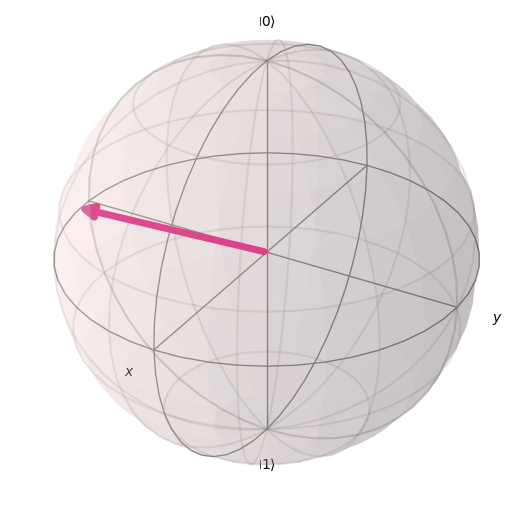

In [58]:
plot_bloch_vector([pi/2,0,1])

When first learning about qubit states, it's easy to confuse the qubits statevector with its Bloch vector. Remember the statevector is the vector discussed in 1.1, that holds the amplitudes for the two states our qubit can be in. The Bloch vector is a visualisation tool that maps the 2D, complex statevector onto real, 3D space.

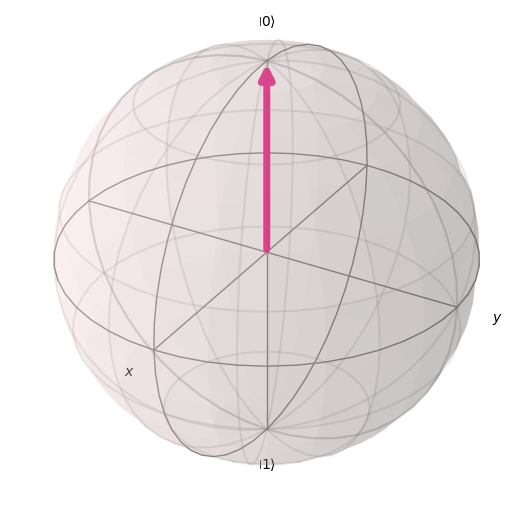

In [59]:
# let's plot |0>
plot_bloch_vector([0,0,1])

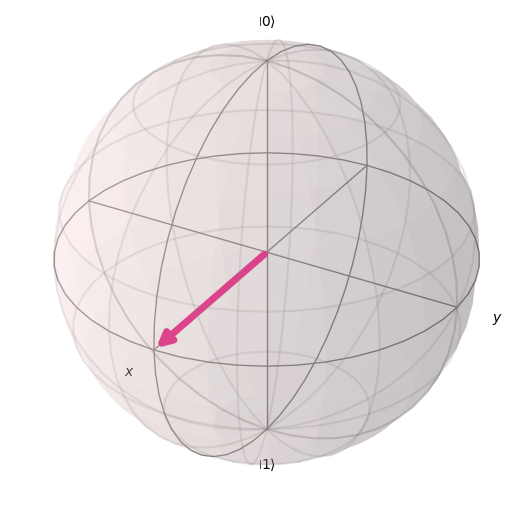

In [60]:
# let's plot |0>
plot_bloch_vector([1,0,0])